<a href="https://colab.research.google.com/github/tussanakorn/Elasticsearch-Colab/blob/master/Python_Elasticsearch_Documents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/colab/kaggle.json ~/.kaggle/ #copy api key ---- depend on your directory -- my directory is .../colab/..
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle competitions download -c ss3-nlp-cmsk-chatbot #download competition dataset

ref                                                                title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide               Covid Cases and Deaths WorldWide                  8KB  2023-02-01 12:22:51           7791        251  1.0              
amaanansari09/top-100-songs                                        Top 100 songs                                     6KB  2023-02-16 18:55:35           1704         69  1.0              
datascientistanna/customers-dataset                                Shop Customer Data                               23KB  2023-02-07 18:42:21           6202        145  1.0              
thedevastator/airbnb-prices-in-european-cities                   

In [ ]:
!unzip ss3-nlp-cmsk-chatbot.zip

Archive:  ss3-nlp-cmsk-chatbot.zip
  inflating: context/1345136.txt     
  inflating: context/1345137.txt     
  inflating: context/1345138.txt     
  inflating: context/1345139.txt     
  inflating: context/1345140.txt     
  inflating: context/1345141.txt     
  inflating: context/1345142.txt     
  inflating: context/1345143.txt     
  inflating: context/1345144.txt     
  inflating: context/1345145.txt     
  inflating: context/1345146.txt     
  inflating: context/1345147.txt     
  inflating: context/1345148.txt     
  inflating: context/1345149.txt     
  inflating: context/1345150.txt     
  inflating: context/1345153.txt     
  inflating: context/1345154.txt     
  inflating: context/1345155.txt     
  inflating: context/1345156.txt     
  inflating: context/1345157.txt     
  inflating: context/1345158.txt     
  inflating: context/1345159.txt     
  inflating: context/1345160.txt     
  inflating: context/1345161.txt     
  inflating: context/1345169.txt     
  inflating: co

## Setup Elasticsearch

In [ ]:
%%capture

!pip install elasticsearch==7.14.0
!apt install default-jdk > /dev/null

In [ ]:
%%capture

!pip install elasticsearch-dsl==7.3.0

In [ ]:
try:
  import os
  import elasticsearch
  from elasticsearch import Elasticsearch
  import numpy as np
  import pandas as pd
  import sys
  import json
  from ast import literal_eval
  from tqdm import tqdm 
  import datetime
  from elasticsearch import helpers
  from elasticsearch_dsl import connections, Document, Text, Integer

  
except Exception as e:
  print(f"error: {e}")

In [ ]:
%%capture

# Download & extract Elasticsearch 7.0.0
!wget https://artifacts.elastic.co/downloads/elasticsearch/elasticsearch-7.0.0-linux-x86_64.tar.gz -q
!tar -xzf elasticsearch-7.0.0-linux-x86_64.tar.gz
!chown -R daemon:daemon elasticsearch-7.0.0

In [ ]:
# Creating daemon instance of elasticsearch
import os
from subprocess import Popen, PIPE, STDOUT
es_server = Popen(['elasticsearch-7.0.0/bin/elasticsearch'], 
                  stdout=PIPE, stderr=STDOUT,
                  preexec_fn=lambda: os.setuid(1)  # as daemon
                 )

In [ ]:
# This part is important, since it takes a little amount of time for instance to load
import time
time.sleep(20)

In [ ]:
%%bash
# If you get 1 root & 2 daemon process then Elasticsearch instance has started successfully
ps -ef | grep elasticsearch

daemon       896     164 85 01:39 ?        00:00:17 /content/elasticsearch-7.0.0/jdk/bin/java -Xms1g -Xmx1g -XX:+UseConcMarkSweepGC -XX:CMSInitiatingOccupancyFraction=75 -XX:+UseCMSInitiatingOccupancyOnly -Des.networkaddress.cache.ttl=60 -Des.networkaddress.cache.negative.ttl=10 -XX:+AlwaysPreTouch -Xss1m -Djava.awt.headless=true -Dfile.encoding=UTF-8 -Djna.nosys=true -XX:-OmitStackTraceInFastThrow -Dio.netty.noUnsafe=true -Dio.netty.noKeySetOptimization=true -Dio.netty.recycler.maxCapacityPerThread=0 -Dlog4j.shutdownHookEnabled=false -Dlog4j2.disable.jmx=true -Djava.io.tmpdir=/tmp/elasticsearch-618781157848239814 -XX:+HeapDumpOnOutOfMemoryError -XX:HeapDumpPath=data -XX:ErrorFile=logs/hs_err_pid%p.log -Xlog:gc*,gc+age=trace,safepoint:file=logs/gc.log:utctime,pid,tags:filecount=32,filesize=64m -Djava.locale.providers=COMPAT -Dio.netty.allocator.type=unpooled -Des.path.home=/content/elasticsearch-7.0.0 -Des.path.conf=/content/elasticsearch-7.0.0/config -Des.distribution.flavor=default -

In [ ]:
# Check if elasticsearch is running
!curl -sX GET "localhost:9200/"

In [ ]:
es = Elasticsearch(hosts = [{"host":"localhost", "port":9200}])
# Check if python is connected to elasticsearch
es.ping()

True

## Search documents

Test 1 question

In [ ]:
# specify path to folder containing the documents
folder_path = '/content/drive/MyDrive/SuperAI3/ss3-nlp-cmsk-chatbot/context' # Change path file

# loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        # read the content of the file
        with open(os.path.join(folder_path, filename), 'r') as f:
            file_content = f.read()

        # index the file content into Elasticsearch
        es.index(index='documents', body={'filename': filename, 'content': file_content})

In [ ]:
# specify the search term
# search_term = 'วันนี้มีข่าวอะไรน่าสนใจบ้าง'
search_term = 'ตลาดหลักทรัพย์ได้กำหนดราคาสูงสุดต่ำสุดของ Warrant อย่างไร'

In [ ]:
# search for the documents that contain the search term
res = es.search(index='documents', body={'query': {'match': {'content': search_term}}})

In [ ]:
# print the filenames of the matching documents
for hit in res['hits']['hits']:
    print(hit['_source']['filename'],hit['_score'])

1345177.txt 3.752451
1345177.txt 3.752451
1345177.txt 3.752451
1345175.txt 3.0431197
1345175.txt 3.0431197
1345175.txt 3.0431197
1345185.txt 2.8939848
1345185.txt 2.8939848
1345185.txt 2.8939848
1345178.txt 2.821513


In [ ]:
d = {'id': [1, 2, 3, 4, 5], 'question': ['วันนี้มีข่าวอะไรน่าสนใจบ้าง', 'เราไม่ได้เก่งคำนวณจะเรียนรู้เรื่องมั้ย', 'คนอื่นๆที่เรียนเค้ารู้สึกยังไงกันบ้าง', 'จำไม่ได้เลย มีอะไรเเนะนำบ้าง', 'พรุ่งนี้หุ้นจะขึ้นมั้ย']}
test_df = pd.DataFrame(data=d)
test_df

,id,question
0,1,วันนี้มีข่าวอะไรน่าสนใจบ้าง
1,2,เราไม่ได้เก่งคำนวณจะเรียนรู้เรื่องมั้ย
2,3,คนอื่นๆที่เรียนเค้ารู้สึกยังไงกันบ้าง
3,4,จำไม่ได้เลย มีอะไรเเนะนำบ้าง
4,5,พรุ่งนี้หุ้นจะขึ้นมั้ย


In [ ]:
# Loop through 'question' column and search for documents
for question in test_df['question']:
    search_results = es.search(index='documents', body={'query': {'match': {'content': question}}})
    filenames = [hit['_source']['filename'] for hit in search_results['hits']['hits']]
    test_df.loc[test_df['question'] == question, 'filename'] = ','.join(filenames)

In [ ]:
test_df

,id,question,filename
0,1,วันนี้มีข่าวอะไรน่าสนใจบ้าง,
1,2,เราไม่ได้เก่งคำนวณจะเรียนรู้เรื่องมั้ย,
2,3,คนอื่นๆที่เรียนเค้ารู้สึกยังไงกันบ้าง,
3,4,จำไม่ได้เลย มีอะไรเเนะนำบ้าง,
4,5,พรุ่งนี้หุ้นจะขึ้นมั้ย,


Use all questions

In [ ]:
train_df = pd.read_csv('/content/train.csv')

In [ ]:
# Loop through 'question' column and search for documents
for question in train_df['question']:
    search_results = es.search(index='documents', body={'query': {'match': {'content': question}}})
    if search_results['hits']['total']['value'] > 0:
        best_result = max(search_results['hits']['hits'], key=lambda x: x['_score'])
        train_df.loc[train_df['question'] == question, 'filename'] = best_result['_source']['filename']

In [ ]:
train_df.head(10)

,file,question,answer,answer_start,answer_end
0,1345136.txt,ใครเป็นผู้ออกตราสารหนี้ภาคเอกชน ไร้ใบตราสาร,ไม่มีการรวมศูนย์อย่างตราสารภาครัฐ แต่ส่วนใหญ่ด...,7716,7799
1,1345195.txt,Penny Stock หุ้นเหรียญ มีลักษณะอย่างไร,*\tหุ้นที่มีราคาซื้อขายต่อหน่วยต่ำ (ในสหรัฐฯ ค...,3019,3138
2,1345200.txt,ราคาต้นงวดคืออะไร,ราคาต้นทุนหรือราคาซื้อ,501,522
3,1345179.txt,อัตราการใช้สิทธิของ NVDR คือเท่าไหร่,1 : 1 (NVRD : สินทรัพย์อ้างอิง) เสมอ,1012,1047
4,1345158.txt,หนังสือชี้ชวนส่วนสรุปข้อมูลสำคัญ (Fund Fact Sh...,เอกสารที่ให้ข้อมูลที่สำคัญกับผู้ลงทุน,1116,1152
5,1345171.txt,ข้อสัญญา (Covenants) คืออะไร,พันธสัญญาที่ผู้ออกตราสารให้ผู้ลงทุนเพื่อเพิ่มค...,892,971
6,1345185.txt,XT คืออะไร,ผู้ซื้อหลักทรัพย์จะไม่มีสิทธิได้รับ TSR,1165,1203
7,1345175.txt,Equity-Linked Product คืออะไร,ถือเป็นตราสารอนุพันธ์ (Derivative) ประเภทหนึ่ง...,241,483
8,1345185.txt,หลักเกณฑ์การขึ้นเครื่องหมาย SP มีอะไรบ้าง,*\tเมื่อขึ้นเครื่องหมาย H แล้วแต่บริษัทไม่สามา...,2825,3250
9,1345158.txt,รายละเอียด เสนอขายกองทุนครั้งแรก (Initial Publ...,*\tต้องแจกจ่ายหนังสือชี้ชวนเพื่อเป็นข้อมูลประก...,1542,1700


/usr/local/lib/python3.8/dist-packages/numpy/lib/stride_tricks.py:537: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


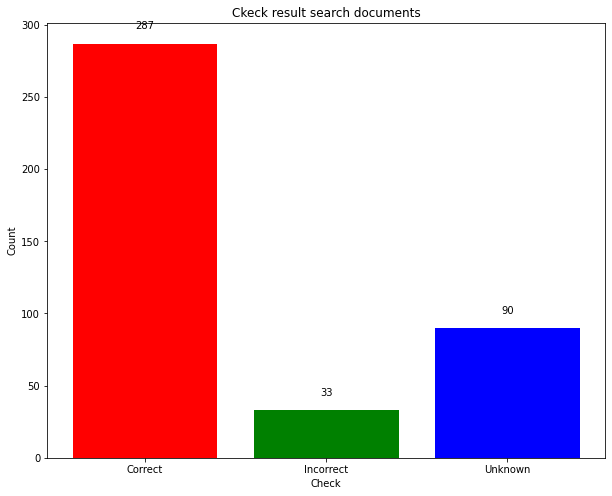

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Count the number of rows where the values in both columns are the same
same_values = (train_df['file'] == train_df['filename']).sum()

# Count the number of rows where the values in the two columns are not the same and are not NaN
different_values = ((train_df['file'] != train_df['filename']) & (~train_df['filename'].isnull())).sum()

# Count the number of rows where the value in the filename column is NaN
nan_values = train_df['filename'].isnull().sum()

# Create bar chart to display counts for each category
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(['Correct', 'Incorrect', 'Unknown'], [same_values[True], different_values[True], nan_values], color=['red', 'green', 'blue'])
ax.set_xlabel('Check')
ax.set_ylabel('Count')
ax.set_title('Ckeck result search documents')
for i, v in enumerate([same_values, different_values, nan_values]):
    ax.text(i, v + 10, str(v), ha='center')
plt.show()

## Add mapping and settings in Elasticsearch


In [ ]:
# Put new mapping and settings
mapping_settings = {
    "settings": {
        "analysis": {
            "analyzer": {
                "trigrams": {
                    "tokenizer": "trigram_tokenizer",
                    "filter": [
                        "lowercase"
                    ]
                }
            },
            "tokenizer": {
                "trigram_tokenizer": {
                    "type": "ngram",
                    "min_gram": 2,
                    "max_gram": 3,
                    "token_chars": []
                }
            }
        }
    },
    "mappings": {
        "properties": {
            "filename": {
                "type": "text",
                "analyzer": "trigrams"
            },
            "content": {
                "type": "text",
                "analyzer": "trigrams"
            }
        }
    }
}

In [ ]:
# Create the index with the new mapping and settings
# index_name ='documents_test2'
# if not es.indices.exists(index_name):
es.indices.create(index='documents_3', body=mapping_settings)

{'acknowledged': True, 'shards_acknowledged': True, 'index': 'documents_3'}

In [ ]:
# Specify path to folder containing the documents
folder_path = '/content/drive/MyDrive/SuperAI3/ss3-nlp-cmsk-chatbot/context'

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        # Read the content of the file
        with open(os.path.join(folder_path, filename), 'r') as f:
            file_content = f.read()

        # Index the file content into Elasticsearch
        es.index(index='documents_3', body={'filename': filename, 'content': file_content})

In [ ]:
# Loop through 'question' column and search for documents
for question in train_df['question']:
    search_results = es.search(index='documents_3', body={'query': {'match': {'content': question}}})
    if search_results['hits']['total']['value'] > 0:
        best_result = max(search_results['hits']['hits'], key=lambda x: x['_score'])
        train_df.loc[train_df['question'] == question, 'filename'] = best_result['_source']['filename']

/usr/local/lib/python3.8/dist-packages/numpy/lib/stride_tricks.py:537: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


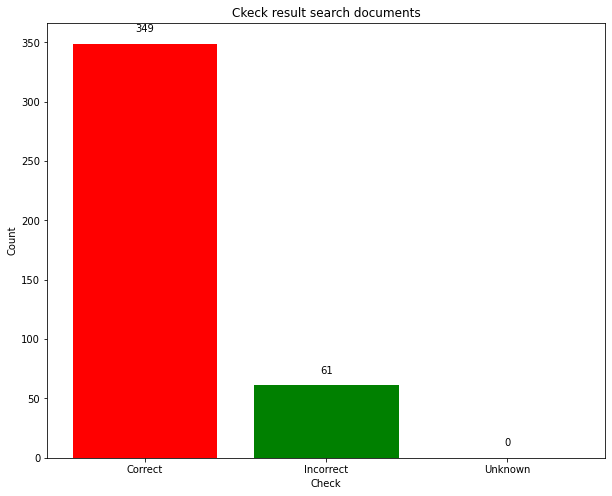

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Count the number of rows where the values in both columns are the same
same_values = (train_df['file'] == train_df['filename']).sum()

# Count the number of rows where the values in the two columns are not the same and are not NaN
different_values = ((train_df['file'] != train_df['filename']) & (~train_df['filename'].isnull())).sum()

# Count the number of rows where the value in the filename column is NaN
nan_values = train_df['filename'].isnull().sum()

# Create bar chart to display counts for each category
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(['Correct', 'Incorrect', 'Unknown'], [same_values[True], different_values[True], nan_values], color=['red', 'green', 'blue'])
ax.set_xlabel('Check')
ax.set_ylabel('Count')
ax.set_title('Ckeck result search documents')
for i, v in enumerate([same_values, different_values, nan_values]):
    ax.text(i, v + 10, str(v), ha='center')
plt.show()

## Using sub paragraph data

In [ ]:
df_context = pd.read_csv('/content/sub_paragraph_58txt_wSameTopic_pos.csv')

In [ ]:
df_context.head()

,subdoc_name,doc_name,context,position
0,0_1345136.txt,1345136.txt,การซื้อขายตราสารหนี้ในไทย\n\n1.\tตลาดตราสารหนี...,"[[0, 945]]"
1,1_1345136.txt,1345136.txt,การซื้อขายตราสารหนี้ในไทย\n1.1\tThailand Bond ...,"[[0, 25], [332, 442], [946, 1196]]"
2,2_1345136.txt,1345136.txt,การซื้อขายตราสารหนี้ในไทย\n1.1\tThailand Bond ...,"[[0, 25], [332, 442], [1197, 1923]]"
3,3_1345136.txt,1345136.txt,การซื้อขายตราสารหนี้ในไทย\n1.1\tThailand Bond ...,"[[0, 25], [332, 442], [1197, 1224], [1924, 2435]]"
4,4_1345136.txt,1345136.txt,การซื้อขายตราสารหนี้ในไทย\n1.1\tThailand Bond ...,"[[0, 25], [332, 442], [1197, 1224], [2436, 2995]]"


In [ ]:
# Loop through each row in the dataframe
for index, row in df_context.iterrows():
    # Read the content of the file
    file_content = row['context']

    # Index the file content into Elasticsearch
    es.index(index='documents_2', body={'filename': row['doc_name'], 'content': file_content})

In [ ]:
# Loop through 'question' column and search for documents
for question in train_df['question']:
    search_results = es.search(index='documents_2', body={'query': {'match': {'content': question}}})
    if search_results['hits']['total']['value'] > 0:
        best_result = max(search_results['hits']['hits'], key=lambda x: x['_score'])
        train_df.loc[train_df['question'] == question, 'filename'] = best_result['_source']['filename']

In [ ]:
train_df

,file,question,answer,answer_start,answer_end,filename,context
0,1345136.txt,ใครเป็นผู้ออกตราสารหนี้ภาคเอกชน ไร้ใบตราสาร,ไม่มีการรวมศูนย์อย่างตราสารภาครัฐ แต่ส่วนใหญ่ด...,7716,7799,1345136.txt,1345136.txt
1,1345195.txt,Penny Stock หุ้นเหรียญ มีลักษณะอย่างไร,*\tหุ้นที่มีราคาซื้อขายต่อหน่วยต่ำ (ในสหรัฐฯ ค...,3019,3138,1345195.txt,1345195.txt
2,1345200.txt,ราคาต้นงวดคืออะไร,ราคาต้นทุนหรือราคาซื้อ,501,522,1345200.txt,NaN
3,1345179.txt,อัตราการใช้สิทธิของ NVDR คือเท่าไหร่,1 : 1 (NVRD : สินทรัพย์อ้างอิง) เสมอ,1012,1047,1345179.txt,1345179.txt
4,1345158.txt,หนังสือชี้ชวนส่วนสรุปข้อมูลสำคัญ (Fund Fact Sh...,เอกสารที่ให้ข้อมูลที่สำคัญกับผู้ลงทุน,1116,1152,1345158.txt,1345158.txt
...,...,...,...,...,...,...,...
405,1345160.txt,กองทุนรวมตราสารหนี้ระยะยาว (Long-Term Fixed-In...,ลงทุนในตราสารหนี้ที่มีอายุเฉลี่ยของตราสารหนี้ถ...,5707,5959,1345160.txt,1345160.txt
406,1345146.txt,อัตราดอกเบี้ยนโยบายเปลี่ยนแปลง จะส่งผลอย่างไร,"อัตราดอกเบี้ยต่างๆในตลาดไม่ว่าจะเป็น เงินฝาก, ...",474,704,1345146.txt,NaN
407,1345154.txt,การลงทุนที่เน้นลงทุนในหุ้นที่มีแนวโน้มการเติบโ...,การลงทุนแบบเน้นการเติบโต (Growth Investing),391,433,1345154.txt,NaN
408,1345160.txt,กองทุนที่ได้สิทธิประโยชน์ทางภาษี คืออะไร,กองทุนรวมที่ให้สิทธิประโยชน์ทางภาษีกับผู้ลงทุน...,14289,14351,1345160.txt,1345160.txt


/usr/local/lib/python3.8/dist-packages/numpy/lib/stride_tricks.py:537: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


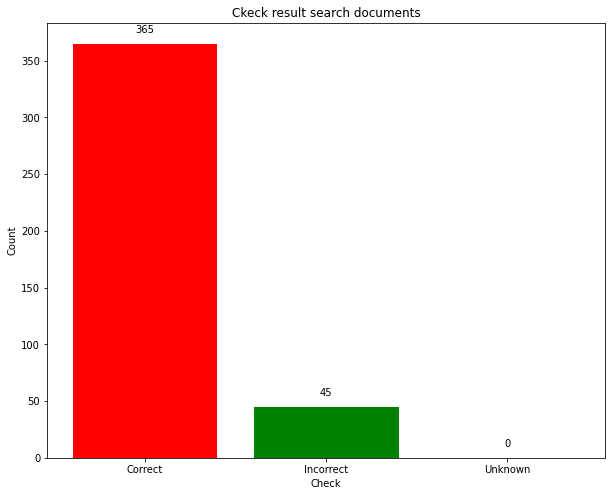

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Count the number of rows where the values in both columns are the same
same_values = (train_df['file'] == train_df['filename']).sum()

# Count the number of rows where the values in the two columns are not the same and are not NaN
different_values = ((train_df['file'] != train_df['filename']) & (~train_df['filename'].isnull())).sum()

# Count the number of rows where the value in the filename column is NaN
nan_values = train_df['filename'].isnull().sum()

# Create bar chart to display counts for each category
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(['Correct', 'Incorrect', 'Unknown'], [same_values[True], different_values[True], nan_values], color=['red', 'green', 'blue'])
ax.set_xlabel('Check')
ax.set_ylabel('Count')
ax.set_title('Ckeck result search documents')
for i, v in enumerate([same_values, different_values, nan_values]):
    ax.text(i, v + 10, str(v), ha='center')
plt.show()

## Test data

In [ ]:
test_df = pd.read_csv('/content/small_test.csv')

In [ ]:
# Loop through 'question' column and search for documents
for question in test_df['question']:
    search_results = es.search(index='documents_2', body={'query': {'match': {'content': question}}})
    if search_results['hits']['total']['value'] > 0:
        best_result = max(search_results['hits']['hits'], key=lambda x: x['_score'])
        test_df.loc[test_df['question'] == question, 'filename'] = best_result['_source']['filename']

In [ ]:
# Loop through 'question' column and search for documents
for question in test_df['question']:
    search_results = es.search(index='documents_2', body={'query': {'match': {'content': question}}})
    filenames = [hit['_source']['filename'] for hit in search_results['hits']['hits']]
    test_df.loc[test_df['question'] == question, 'filename'] = ','.join(filenames)

In [ ]:
test_df

,id,question,filename
0,1,ตลาดหลักทรัพย์ได้กำหนดราคาสูงสุดต่ำสุดของ Warr...,1345184.txt
1,2,ลักษณะแนวทางในการระดมทุนมีอะไรบ้าง,1345193.txt
2,3,Gross Price หรือ Dirty Price มีวิธีการจ่ายดอกเ...,1345143.txt
3,4,รายได้จากการลงทุนต่อ (Reinvestment income) คือ...,1345172.txt
4,5,ตัวอย่างลำดับเหตุการณ์ที่เกี่ยวข้องกับการจ่ายเ...,1345196.txt
5,6,กรณีมีวิกฤตร้ายแรง จะหยุดทำการซื้อขายชั่วคราวต...,1345186.txt
6,7,เงินปันผลกรณีนิติบุคคลทั่วไป มีกรณีใดบ้าง,1345161.txt
7,8,การวิเคราะห์ SWOT ต้องพิจารณาปัจจัยอะไรบ้าง,1345191.txt
8,9,กรณีระบบซื้อขายของตลาดฯ ขัดข้อง จะหยุดทำการซื้...,1345186.txt
9,10,การเสียภาษีบุคคลธรรมดาได้รับการยกเว้นอะไรบ้าง,1345161.txt


In [ ]:
test_df.to_csv('small_test_updated.csv', index=False)